# Linear Regression - Advertising

### Linear Model

Equation:
$y=\beta_0+\beta_1x_1+...+\beta_nx_n+\epsilon$
Where:
- y is the response variable
- $\beta_0$ is the intercept (**model.intercept_**)
- $\beta_i$ is the coefficient of the i feature (**model.coef_**)
- $x_i$ is the i_th feature

### Import Libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

### Setup Libraries

In [2]:
# Visualization Mode
%matplotlib inline

# Visualization Style
sns.set_style('whitegrid')

### Import Datasets

In [3]:
advertising = pd.read_csv('../datasets/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### Exploratory Data Analysis

In [4]:
advertising.shape

(200, 4)

In [5]:
advertising.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


### Data Visualization

In [9]:
features = ['TV', 'radio', 'newspaper']

#### Distribution Visualization

<Axes: >

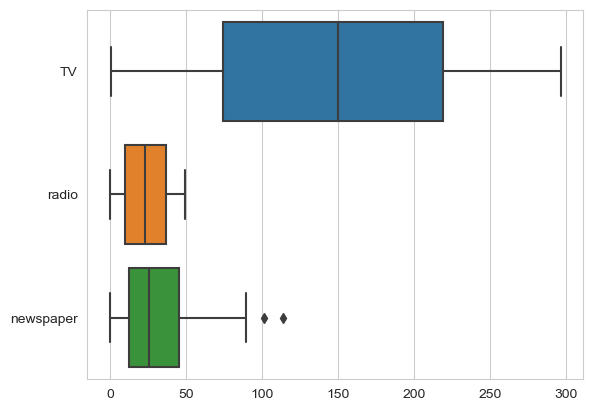

In [10]:
sns.boxplot(advertising[features], orient='h')

#### Relationship Visualization: Sales vs Others

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


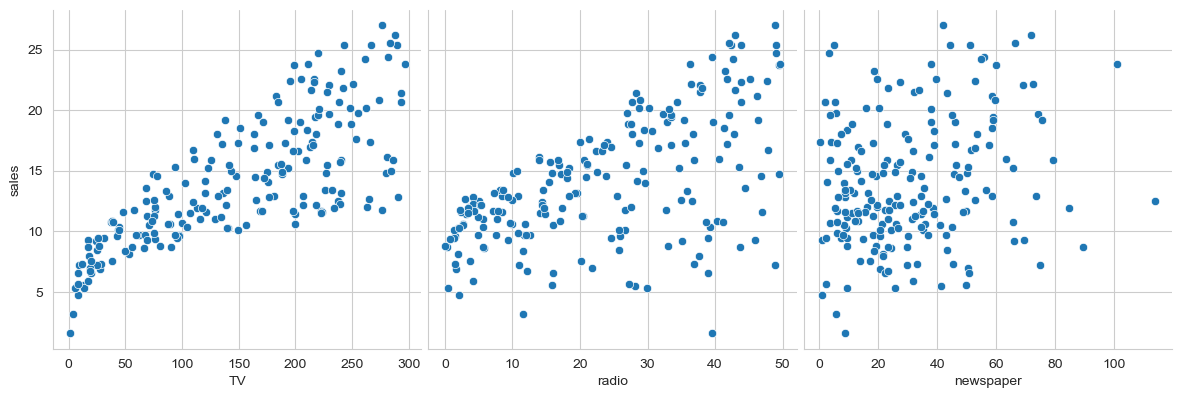

In [11]:
sns.pairplot(advertising, x_vars=features, 
             y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

#### Correlation

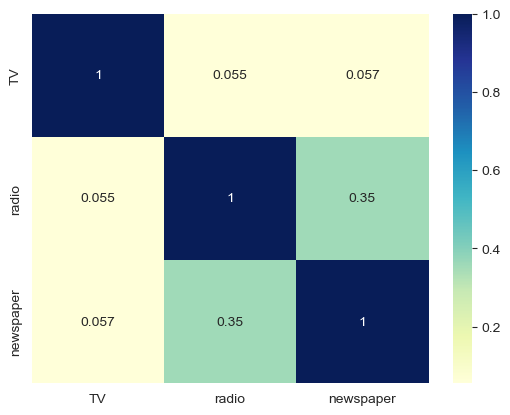

In [12]:
sns.heatmap(advertising[features].corr(), cmap="YlGnBu", annot = True)
plt.show()

### Simple Linear Regression: Sales vs TV Advertising

#### Model Creation

In [13]:
regr = LinearRegression()

#### Prepare the Data

In [14]:
X = advertising['TV'].values.reshape(-1,1)
y = advertising['sales']

#### Train-Test Data Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

#### Train the Model

In [16]:
regr.fit(X_train, y_train)

LinearRegression()

#### Get the Coefficients

In [17]:
print("Model slope:", regr.coef_[0])
print("Model intercept:", regr.intercept_)

Model slope: 0.04428059109151899
Model intercept: 7.4983352299156785


#### Visualize the Fit on the Training Set

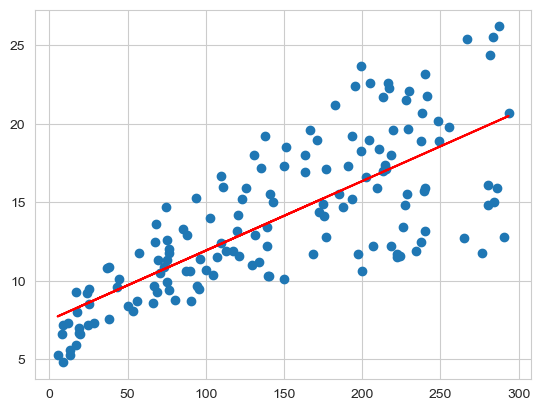

In [18]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regr.intercept_ + regr.coef_[0] * X_train, 'r')
plt.show()

### Model Evaluation

#### Predictions on the Test Set

In [19]:
y_pred = regr.predict(X_test)

#### Calculate MSE (Mean Squared Error)

In [20]:
math.sqrt(metrics.mean_squared_error(y_test, y_pred))

3.5055919729866134

#### Calculate $R^2$

In [21]:
metrics.r2_score(y_test, y_pred)

0.6815519860448689

#### Visualize the Fit on the Test Set

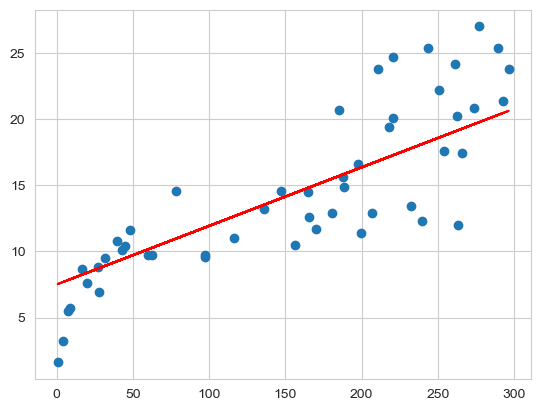

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, regr.intercept_ + regr.coef_[0] * X_test, 'r')
plt.show()

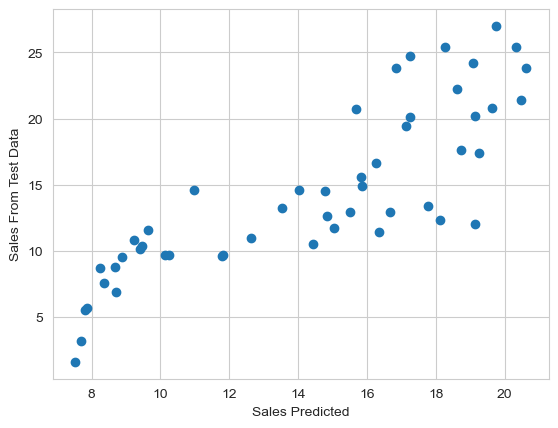

In [23]:
plt.scatter(y_pred, y_test)
plt.xlabel('Sales Predicted')
plt.ylabel('Sales From Test Data')
plt.show()

### Errors Analysis

#### Calculate Errors on Training Set

In [24]:
y_train_pred = regr.predict(X_train)
res = (y_train - y_train_pred)

#### Visualize Errors Distribution

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


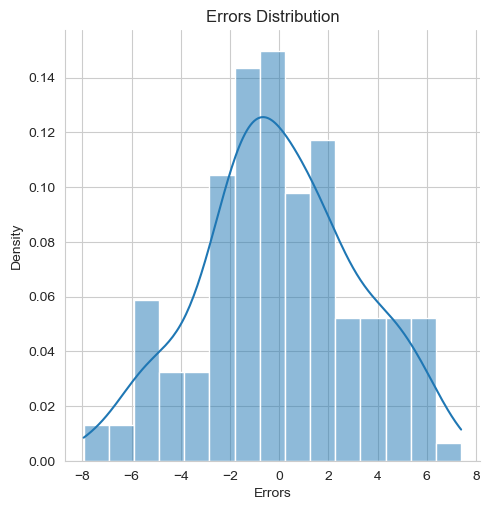

In [25]:
sns.displot(res, bins = 15, kde=True, stat='density')
plt.title('Errors Distribution')
plt.xlabel('Errors')
plt.show()

### Regression Coefficients

In [26]:
# Regression coefficients (Ordinary Least Squares)
regr = LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

14.0225
[0.04753664]


In [27]:
# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000

# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss

2.1025305831313514

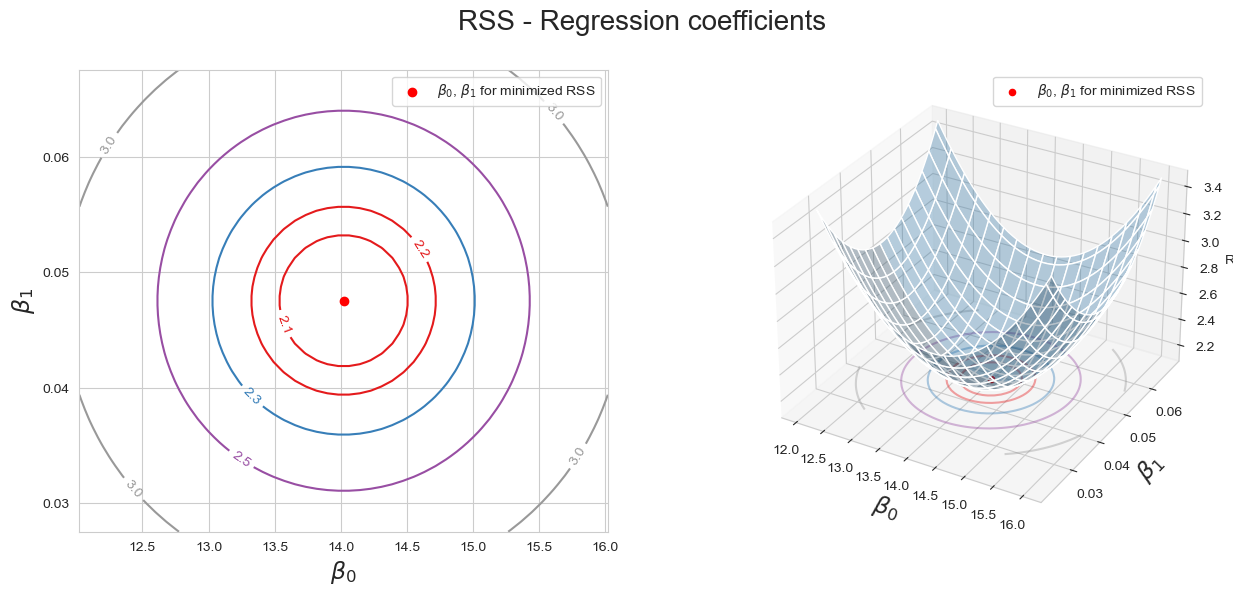

In [28]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - Regression coefficients', fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=17)
    ax.set_ylabel(r'$\beta_1$', fontsize=17)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()